# Step 1 — Load and Inspect Dataset

This step loads the synthetic Air France dataset we created, checks its shape and structure, and displays the first few rows to verify everything is correct before preprocessing.


In [1]:


# Air France SAF Project — Model Training and Evaluation

# 📦 Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# 📁 Load dataset
data = pd.read_csv("../data/synthetic_airfrance_customer_data.csv")

# 🧾 Display basic info
print("Dataset loaded successfully!")
print("Shape of data:", data.shape)
print("\nColumns:\n", list(data.columns))
data.head(25)


Dataset loaded successfully!
Shape of data: (10000, 13)

Columns:
 ['customer_id', 'country_of_origin', 'loyalty_tier', 'past_saf_purchase', 'adds_paid_options', 'booking_class', 'num_passengers', 'length_of_stay_days', 'destination_region', 'flight_distance_km', 'ticket_price_eur', 'co2_emission_kg', 'saf_contribution']


,customer_id,country_of_origin,loyalty_tier,past_saf_purchase,adds_paid_options,booking_class,num_passengers,length_of_stay_days,destination_region,flight_distance_km,ticket_price_eur,co2_emission_kg,saf_contribution
0,1,Italy,Silver,0,1,Economy,1,14,Domestic,603,174.03,54.27,0
1,2,USA,Silver,0,0,Economy,4,9,Intercontinental,8740,1426.02,786.60,0
2,3,Netherlands,Silver,0,1,Economy,2,8,EU,2154,437.46,193.86,0
3,4,Germany,Gold,0,0,Economy,4,4,EU,1236,306.53,111.24,0
4,5,France,Silver,0,1,Economy,2,12,Domestic,677,191.47,60.93,0
5,6,France,Platinum,0,1,Economy,2,12,Domestic,589,148.83,53.01,0
6,7,France,Silver,1,1,Economy,1,3,Domestic,1023,247.37,92.07,0
7,8,USA,Gold,0,0,Economy,3,12,Intercontinental,8280,1347.22,745.20,0
8,9,Germany,Gold,0,1,Economy,1,3,EU,1238,238.19,111.42,0
9,10,Netherlands,Gold,0,0,Economy,4,13,EU,2089,418.09,188.01,0


# Step 2 — Data Encoding and Train/Test Split

Convert all categorical columns into numeric format (Label Encoding) so the model can understand them,
then split the dataset into Train and Test parts (80 % / 20 %) for model training and evaluation.

- -> For now we are using Test/Train Split→ 80/20 (demo and development)

- -> In production we will be using → K-Fold or Train/Validate/Test (more stable)

In [ ]:
# STEP 2 — ENCODING + TRAIN/TEST SPLIT

# Separate features and target
X = data.drop(columns=["saf_contribution"])
y = data["saf_contribution"]

# Encode categorical columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
categorical_cols = X.select_dtypes(include="object").columns

for col in categorical_cols:
    X[col] = encoder.fit_transform(X[col])

# Split data into Train and Test sets (80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Confirmation
print("Encoding & split completed successfully!")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Encoding & split completed successfully!
Train shape: (8000, 12)
Test shape: (2000, 12)


# Step 3 — Logistic Regression Model

Train a simple and interpretable baseline model to predict whether a customer will contribute to SAF or not.
This model helps us understand how each feature affects the likelihood of contribution.


Logistic Regression Model Evaluation:

Accuracy: 0.894

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      1589
           1       0.78      0.68      0.73       411

    accuracy                           0.89      2000
   macro avg       0.85      0.82      0.83      2000
weighted avg       0.89      0.89      0.89      2000



c:\Users\etulyon1\miniconda3\envs\saf-airfrance\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


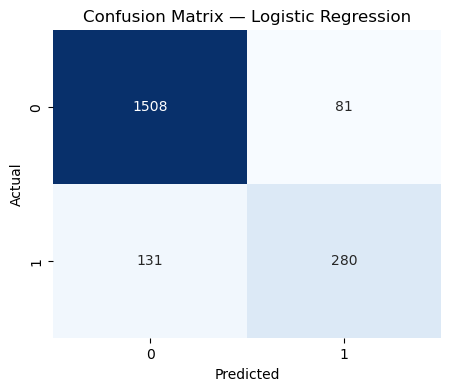

In [6]:
# STEP 3 — LOGISTIC REGRESSION MODEL

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train model
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Model Evaluation:\n")
print("Accuracy:", round(accuracy_score(y_test, y_pred_lr), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix Visualization
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix — Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Step 4 — LightGBM Model
Train a gradient boosting model (LightGBM) to improve accuracy and capture deeper relationships in SAF contribution behavior.


[LightGBM] [Info] Number of positive: 1642, number of negative: 6358
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1059
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205250 -> initscore=-1.353799
[LightGBM] [Info] Start training from score -1.353799
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

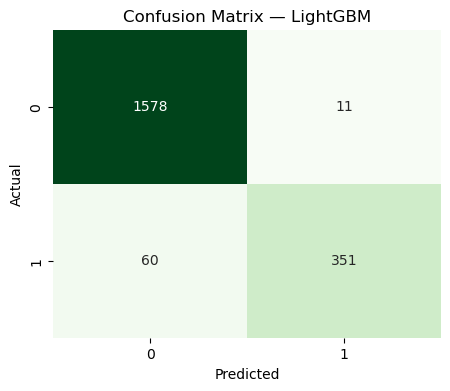

In [7]:
# STEP 4 — LIGHTGBM MODEL

from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


lgb_model = LGBMClassifier(
    n_estimators=80,         # fewer trees = less learning capacity
    learning_rate=0.12,      # learns faster but less precisely
    max_depth=2,             # shallow trees → fewer fine rules
    subsample=0.7,           # uses only 70% of data per tree
    colsample_bytree=0.7,    # uses only 70% of features per tree
    min_child_samples=40,    # needs more samples to make a split
    random_state=42
)



lgb_model.fit(X_train, y_train)

# Predictions
y_pred_lgb = lgb_model.predict(X_test)

# Evaluation
print(" LightGBM Model Evaluation:\n")
print("Accuracy:", round(accuracy_score(y_test, y_pred_lgb), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgb))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred_lgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix — LightGBM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Step 5 — Model Comparison (Logistic Regression vs LightGBM)

Compare the performance of both models on the same test set to understand which model
generalizes better and is more reliable for predicting SAF contribution.


 Model Performance Comparison:

                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression     0.894      0.776   0.681     0.725
1             LightGBM     0.965      0.970   0.854     0.908


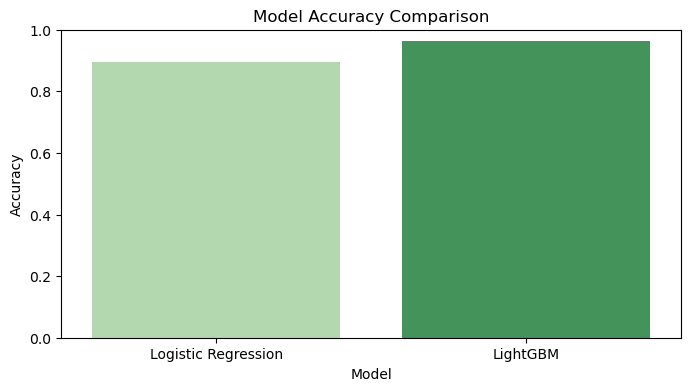

In [8]:
# STEP 5 — MODEL COMPARISON

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Compare metrics for both models
results = pd.DataFrame({
    "Model": ["Logistic Regression", "LightGBM"],
    "Accuracy": [
        round(accuracy_score(y_test, y_pred_lr), 3),
        round(accuracy_score(y_test, y_pred_lgb), 3)
    ],
    "Precision": [
        round(precision_score(y_test, y_pred_lr), 3),
        round(precision_score(y_test, y_pred_lgb), 3)
    ],
    "Recall": [
        round(recall_score(y_test, y_pred_lr), 3),
        round(recall_score(y_test, y_pred_lgb), 3)
    ],
    "F1-Score": [
        round(f1_score(y_test, y_pred_lr), 3),
        round(f1_score(y_test, y_pred_lgb), 3)
    ]
})

print(" Model Performance Comparison:\n")
print(results)

# Visual bar comparison
plt.figure(figsize=(8,4))
sns.barplot(x="Model", y="Accuracy", data=results, palette="Greens", hue="Model", legend=False)

plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()


# Step 6 — Save Trained Models for Deployment

Save both trained models using joblib so that they can be reused directly in the Streamlit app
without needing to re-train each time.


In [9]:
# STEP 6 — SAVE TRAINED MODELS FOR DEPLOYMENT

import joblib
import os

# Create a 'models' folder
os.makedirs("../models", exist_ok=True)


# Save both models
joblib.dump(log_reg, "../models/logistic_regression_model.pkl")
joblib.dump(lgb_model, "../models/lightgbm_model.pkl")

print("Models saved successfully in '../models/' folder.")


Models saved successfully in '../models/' folder.


## Step 7 — SHAP Explainability Analysis

To understand how each feature contributes to the model’s SAF contribution prediction, we use **SHAP (SHapley Additive Explanations)**.  
This method helps visualize which factors most strongly influence the model's decision for each passenger profile.  
It’s not required for app deployment, but essential for explainable AI and reporting.


In [15]:
import shap
import os
import matplotlib.pyplot as plt  # add this to enable plt.savefig

# Create the explainer
explainer = shap.Explainer(lgb_model, X_train)

# Calculate SHAP values for test set
shap_values = explainer(X_test)

# Visualize feature importance
shap.summary_plot(shap_values, X_test, show=False)

# Ensure output folder exists before saving
os.makedirs("../data/outputs", exist_ok=True)

# Save the SHAP summary plot
plt.savefig("../data/outputs/saf_shap_summary.png", bbox_inches="tight")
plt.close()



# SHAP Summary — Model Explainability

The SHAP (SHapley Additive exPlanations) analysis helps us understand how each input feature influenced the LightGBM model’s SAF contribution predictions.

notebooks/data/outputs/saf_shap_summary.png

This is where the SHAP visualization is saved after model training.

**What the Plot Shows:**

- Each dot represents one passenger (or data point).

- The x-axis (SHAP value) shows the impact of that feature on the model’s prediction.

- Positive → higher likelihood of SAF contribution

- Negative → lower likelihood

- The color gradient (blue → red) represents the feature’s original value (low → high).

- Top features like past_saf_purchase, loyalty_tier, and booking_class have the strongest influence on prediction outcomes.